# Изучение закономерностей, определяющих успешность компьютерных игр.

<h1>Описание проекта.<span class="tocSkip"></span></h1>

Интернет-магазин продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
 
Анализ данных условно производится в декабре 2016 года, планируется кампания на 2017 г.


<h1>Основная цель проекта.<span class="tocSkip"></span></h1>

Используя исторические данные о продажах компьютерных игр необходимо выявить закономерности, определяющие успешность игры. Цель: определить потенциально популярный продукт и спланировать рекламные кампании в следующем году.

# Задачи исследования.

<b>1. Изучение данных.</b>

- изучение датасета
- поиск аномалий
- предварительные выводы


<b>2. Предобработка данных.</b> 

- замена названия столбцов (приведение к нижнему регистру)
- замена типов данных
- поиск и устранение ошибок в данных
- поиск и обработка пропусков
- расчет суммарных продаж во всех регионах и запись их в отдельный столбец.
- вывод



<b>3. Исследовательский анализ данных.</b>

- изучение количества игр, выпускаемых в разные годы. Определить: важны ли данные за все периоды?
- изучение того, как менялись продажи по платформам. Определение платформ с наибольшими суммарными продажами и построение распределения по годам. Определение: за какой характерный срок появляются новые и исчезают старые платформы?
- выбор данных за соответствующий актуальный период и исключить из работы данные за предыдущие периоды. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- определить какие платформы лидируют по продажам, растут или падают. Выбрать несколько потенциально прибыльных платформ.
- построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- изучение, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
- построение диаграммы рассеяния и расчет корреляции между отзывами и продажами. Сформулировать выводы.
Сооотнести выводы с продажами игр на других платформах.
- изучение общего распределения игр по жанрам. Отверить на вопросы: что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
-  вывод

<b>4. Составление портрета пользователя каждого региона.</b>

- определение для пользователя каждого региона (NA, EU, JP):

     - самых популярных платформ (топ-5). Описание различия в долях продаж.
     - самых популярных жанров (топ-5). Пояснение разницы.

- ответить на вопрос: влияет ли рейтинг ESRB на продажи в отдельном регионе?
- вывод

<b>5. Проверка гипотез.</b>

- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- вывод

<b>6. Результаты исследования.</b>

- Общие выводы
- Рекомендации

<b>ОПИСАНИЕ  ДАННЫХ:</b>

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Изучение данных.

In [1]:
import pandas as pd
import numpy as np
import math
import warnings                   
warnings.filterwarnings('ignore')
from scipy import stats as st
from IPython.display import display
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
# Изучим датасет: первые строки, последние,рандомная выборка
df = pd.read_csv('/datasets/.....csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,"2,009.00",Adventure,0.00,0.01,0.00,0.00,63.00,5.8,NaN
16706,Men in Black II: Alien Escape,GC,"2,003.00",Shooter,0.01,0.00,0.00,0.00,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,"2,014.00",Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,"2,002.00",Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,"2,008.00",Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,"2,016.00",Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,"2,003.00",Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,"2,016.00",Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [4]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15484,Oil Rush,PC,"2,012.00",Strategy,0.00,0.02,0.00,0.00,67.00,6.5,NaN
8032,Fear Effect 2: Retro Helix,PS,"2,001.00",Action,0.10,0.07,0.00,0.01,84.00,8.9,M
3507,Mega Man Star Force 2: Zerker x Ninja / Saurian,DS,"2,007.00",Action,0.24,0.00,0.31,0.02,NaN,NaN,NaN
16033,FIFA Soccer 08,PC,"2,007.00",Sports,0.00,0.01,0.00,0.00,77.00,6.1,E
14754,SingStar Fussballhits,PS3,"2,010.00",Misc,0.00,0.02,0.00,0.01,NaN,NaN,NaN
808,Portal 2,X360,"2,011.00",Shooter,1.41,0.49,0.01,0.17,95.00,8.5,E10+
2702,Marvel vs. Capcom 2: New Age of Heroes,PS2,"2,002.00",Fighting,0.31,0.24,0.13,0.08,NaN,NaN,NaN
7717,The King of Fighters XI,PS2,"2,006.00",Fighting,0.07,0.06,0.04,0.02,75.00,8.5,T
6573,Formula One 2001,PS2,"2,001.00",Racing,0.13,0.10,0.00,0.03,73.00,6,E
15424,Natalie Brooks: Mystery at Hillcrest High,DS,"2,012.00",Action,0.00,0.02,0.00,0.00,NaN,NaN,NaN


In [5]:
# посмотрим общую информацию датасета, пропуски, описательную статистику, дубликаты
print('Общая информация')
print(df.info())
print('\n')
print('Пропущенные значения:')
print(df.isna().sum())
print('\n')
print('Описательная статистика')
display(df.describe())
print('\n')
print('Дубликаты')
print(df.duplicated().sum())

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Пропущенные значения:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Cri

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00




Дубликаты
0


Видим, что в колонках 'Name' и 'Genre' по два пропуска . Посмотрим на пропуски в этих колонках. 

In [6]:
df[df['Name'].isna() == True]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что игра выпущена на платформе, которая скорее всего уже неактуальна (1993 г.), и пропуски в колонках жанра и наименования игр совпадает, значит эти пропуски лежат в одних и тех же строках датасета. 

In [7]:
# Дополнительно посмотрим на значения в столбце 'Rating',
# видим условные обозначения,для понимания этих значений сделаем запросы в интернете и расшифруем

df.Rating.value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

### Предварительные выводы

- строк в датасете 16715 с информацией за период с 1980 г. по 2016г



- Нужно изменить типы данных:

Год выпуска ( колонка 'Year_of_Release') заменим 'float64' на 'int'.

Оценка пользователей (колонка 'User_Score') заменим 'object' на 'float'. Также в колонке видим нечисловые значения - 'tbd' - изучим и разберемся с ними.


- Следует обработать пропуски:

Столбец с названиием игры ('Name') пропущено 2 значения. Изучили эти пропуски. Данные строки можно удалить, т.к. никакой информации они не несут, восстановить не получится.


Столбец 'год выпуска' ('Year_of_Release')  269 пропусков - их судьбу решим при обработке.
Столбцы: 'оценка критиков' ('Critic_Score') 8578 пропусков;'оценка пользователей' ('User_Score') 6701 пропусков;'рейтинг от организации' ('ESRB Rating') 6766 пропусков. Пропуски возможно указывают, что игры не получили оценку и рейтинг из-за того, что они не популярны или эти игры выпускались до появления платформ и компаний по оценке компьютерных игр. 


- Следует привести названия столбцов к нижнему регистру.


- в столбце Rating лежат оценки согласно организации ESRB (информацию о классификации рейтингов взяли на сайте ESRB):

E - для всех возрастов от 6 лет 

E10+ - Для всех от 10 лет и старше

T - для подростков от 13 лет и старше 

M - для взрослых от 17 лет и старше 

EC - для всех возрастов (все), тоже самое, что и Е

RP - продукт был отправлен в ESRB и ожидает присвоения рейтинга

K-A - для всех возрастов (все), тоже самое, что и Е

AO - только для взрослых старше 18 лет 


 ## Предобработка данных.

### Замена названия столбцов (приведение к нижнему регистру)

In [8]:
# Приведем названия столбцов к нижнему регистру и проверим

df.columns = df.columns.str.lower()
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Поиск и устранение ошибок в данных

In [9]:
# разберёмся с нечисловыми значениями в столбце 'user_score'
# кроме 'nan', попадаются ещё 'tbd' (To Be Determined) - по сути те же NaN
print(df['user_score'].unique())



['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [10]:
# заменим значения 'tbd' на NaN:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [11]:
# проверим
print(df['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


### Изменение типов данных, обработка пропусков

In [12]:
# Теперь изменим тип данных столбца 'user_score' на float
df['user_score'] = df['user_score'].astype(float)

In [13]:
# посмотрим на пропуски в столбце 'year_of_release'
df[df['year_of_release'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.50,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.40,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.90,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.00,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.00,6.50,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.00,6.70,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Как можем поступить с этими пропусками. Идея вписать годы выпуска игр, при количестве 269 пропусков - трудоемкая работа и не качественная идея, так как: 1. Большие временные затраты. 2. При получении из интернет ресурса информации о дате выпуска игр, имеем большую вероятность ошибки получения таких данных, так как компьютерная игра может выпускаться разработчиками в разное время для различных платформ.

В связи с тем, что количество строк небольшое относительно всего объема датасета, но при дальнейшем анализе данных год выпуска имеет важное значение, считаю верным решением - удаление  данных пропусков.



In [14]:
# удаляем пропуски в столбце 'year_of_release'
df = df.dropna(subset=['year_of_release'])

In [15]:
# проверим результат
df['year_of_release'].isna().sum()

0

In [16]:
# разберемся с типами данных в столбце 'year_of_release', заменив их на 'int' и проверим результат
df['year_of_release'] = df['year_of_release'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [17]:
# удалим пропуски в столбце 'genre' и 'name', мы их предварительно изучали,
#причины необходимости их удаления указаны выше

df = df[df['name'].isna() == False]
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Теперь обработаем пропуски в рейтингах ESRB  и оценки пользователей плюс критиков. Идея обработки такова:
Заполним, где это возможно, пропуски в оценках столбцов 'critic_score' и 'user_score' на основе оценок той же игры, но на других платформах. Не заполненные оставшиеся пропуски в оценках критиков и пользователей оставим без изменений (на нулевое значение заменять некорректно, так как мы видели из исследования уникальных значений столбца 'user_score', что есть реальная оценка с нулевым значением, и такая замена приведет к искажению данных).

Игры на разных платформах могут отличаться рейтингом (мы выяснили, что рейтинг ESRB это не оценка, а классификация целевой аудитории), поэтому заменять на рейтинги игры с таким же наименованием , но на другой платформе - не корректно, так как контент на разных платформах может отличаться. Пропуски в рейтинге ESRB заменим на 'out of rating'. Задача максимально сохранить строки с информацией о количестве продаж, а также количество строк с пропусками в рейтинге и оценках велико, относительно количества строк датасета (около 50 %), поэтому не удаляем их (удалив их получим слишком искаженные данные по результату анализа). Также важно учитывать, что рейтинг ESRB создан для пользователей США и Канады, изучила классификацию рейтингов в других странах - применяется иная классификация, поэтому это может быть также причиной большого объема пропусков в этом столбце. Точно не удаляем.

In [18]:
#Заполним по возможности пропуски в 'critic_score':
print('Пропусков в critic_score до заполнения:', df['critic_score'].isna().sum())

df['critic_score'] = df['critic_score'].fillna(df.groupby('name')['critic_score'].transform('median'))

print('Пропусков в critic_score после заполнения:', df['critic_score'].isna().sum())

Пропусков в critic_score до заполнения: 8461
Пропусков в critic_score после заполнения: 7522


In [19]:
#Заполним по возможности пропуски в 'user_score':
print('Пропусков в user_score до заполнения:', df['user_score'].isna().sum())

df['user_score'] = df['user_score'].fillna(df.groupby('name')['user_score'].transform('median'))

print('Пропусков в user_score после заполнения:', df['user_score'].isna().sum())

Пропусков в user_score до заполнения: 8981
Пропусков в user_score после заполнения: 7920


In [20]:
# заполним пропуски в столбце'rating' значением 'out of rating'
print('Пропусков в rating до заполнения:', df['rating'].isna().sum())

df['rating'] = df['rating'].fillna('out of rating') 

print('Пропусков в rating после заполнения:', df['rating'].isna().sum())
df.head(10)

Пропусков в rating до заполнения: 6676
Пропусков в rating после заполнения: 0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,out of rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,out of rating
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,out of rating
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.00,8.40,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,out of rating


### Расчет суммарных продаж во всех регионах и запись их в отдельный столбец.

In [21]:
# добавим в таблицу столбец суммарных продаж по всем регионам

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(10)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,out of rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,out of rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,out of rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.00,8.40,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,out of rating,28.31


### Вывод.

Привели названия столбцов к нижнему регистру.

Заменили аномалии (нечисловые значения) в столбце 'user_score' на 'nan', а именно:  'tbd' (To Be Determined) - по сути те же nan.

Привели типы данных к нужным нам для дальнейшего исследования.

Обработали пропуски. А именно:

Пропуски в количестве 2-х в столбцах 'name', 'genre' - удалили, так как при изучении информации по этим строкам установлено, что игра выпущена на платформе, которая скорее всего уже неактуальна (1993 г.), и пропуски в колонках жанра и наименования игр совпадает, значит эти пропуски лежат в одних и тех же строках датасета. 


Удалили пропуски в столбце 'year_of_release'. Причина принятия данного решения: при количестве 269 пропусков (небольшое количество относительно всего датасета)- заменять их на аналогичные не корректно, так как компьютерная игра с одинаковым названием может выпускаться разработчиками в разное время для различных платформ.


 
Заполнили, по возможности, пропуски в оценках столбцов 'critic_score' и 'user_score' на основе оценок той же игры, но на других платформах. Не заполненные оставшиеся пропуски в оценках критиков и пользователей оставили без изменений (на нулевое значение заменять некорректно, так как мы видели из исследования уникальных значений столбца 'user_score', что есть реальная оценка с нулевым значением, и такая замена приведет к искажению данных).

Пропуски в столбце рейтинга заменили на 'out of rating'. Причина принятия такого решения следующая: 
Игры на разных платформах могут отличаться рейтингом (мы выяснили, что рейтинг ESRB это не оценка, а классификация целевой аудитории), поэтому заменять на рейтинги игры с таким же наименованием , но на другой платформе - не корректно, так как контент на разных платформах может отличаться.  Также количество строк с пропусками в рейтинге, относительно количества строк датасета (около 50 %), поэтому не удалили их (при удалении могли получить большое искажение данных по результату анализа). Также при исследовании информации по рейтингу ESRB, установлено, что ESRB это  негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. в Европе действует PEGI — европейская рейтинговая система компьютерных и видеоигр, в Японии - CERO — японская рейтинговая организация. Таким образом, пропуски в большом количестве данного столбца могли образоваться из-за разных критериев оценки рейтинга пользователями из различных регионов мира.
 
Добавили столбец с общей выручкой каждой игры.

## Исследовательский анализ данных.

### Изучение количества игр, выпускаемых в разные годы.

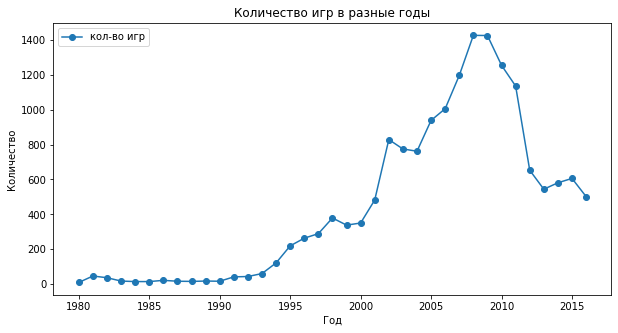

In [22]:
# построим график выпуска компьютерных игр в разные годы
plt.figure(figsize=(10,5))
plt.title('Количество игр в разные годы')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.plot(df.pivot_table(index='year_of_release', values='platform', aggfunc='count'), 'o', linestyle='solid', label='кол-во игр')
plt.legend(loc="upper left")
plt.show()

Видим, что максимальное количество игр было выпущено в период 2008-2009 годах. Затем постепенно происходит снижение колличества игр и так же резкое снижение выпускаемых игр, начиная с 2012 года. Возможные причины: рост игр на мобильных устройствах (телефоны, планшеты), также разработка игр становится более трудоемкой, в связи с возросшими требованиями потребителей к графике и иным возможностям игр, и на разработку уходит больше времени. Одновременно, возможно, что разработчики анализируя огромную популярность определенных игр, могли сменить стратегию с выпуска новых игр, на апгрейд уже выпущенных ранее.



### Изучение того, как менялись продажи по платформам. Определение платформ с наибольшими суммарными продажами и построение распределения по годам. 

Построим график и посмотрим, какие игровые платформы за все всемя имели самые большие продажи.

In [24]:
# Функция принимает на вход датафрейм `df` и строит по нему график суммарных продаж 
# по списку платформ `platform` по годам с 'year_begin' по 'year_end' включительно 
def year_sales(df, platform, year_begin, year_end, title):
    plt.figure(figsize=(18,10))
    plt.title(title)
    plt.xlabel('Год')
    plt.ylabel('Продажи, млн')
    
    for name in platform: 
        plt.plot(df[(df['year_of_release'] >= year_begin) & (df['year_of_release'] <= year_end) & (df['platform'] == name)]
                 .groupby('year_of_release')['total_sales'].sum(), 'o-', label=name
                )
    
    plt.legend(loc="upper left")
    plt.show()

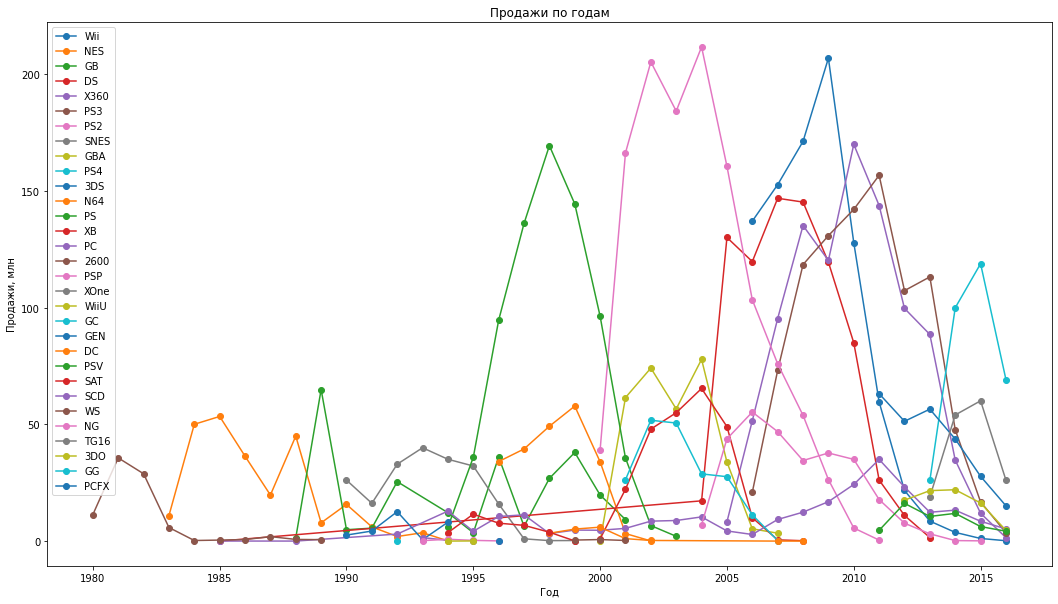

In [25]:
# Посмотрим, как менялись суммарные продажи по всем платформам за все годы:
year_sales(df, df['platform'].unique(), 1980, 2016,'Продажи по годам')

Так, пока видим на графике ,большое количество игровых, продажи по которым уже с 2010 г. не актуальны. Поэтому отсортируем платформы с максимальным количеством продаж за все время и посмотрим на график.

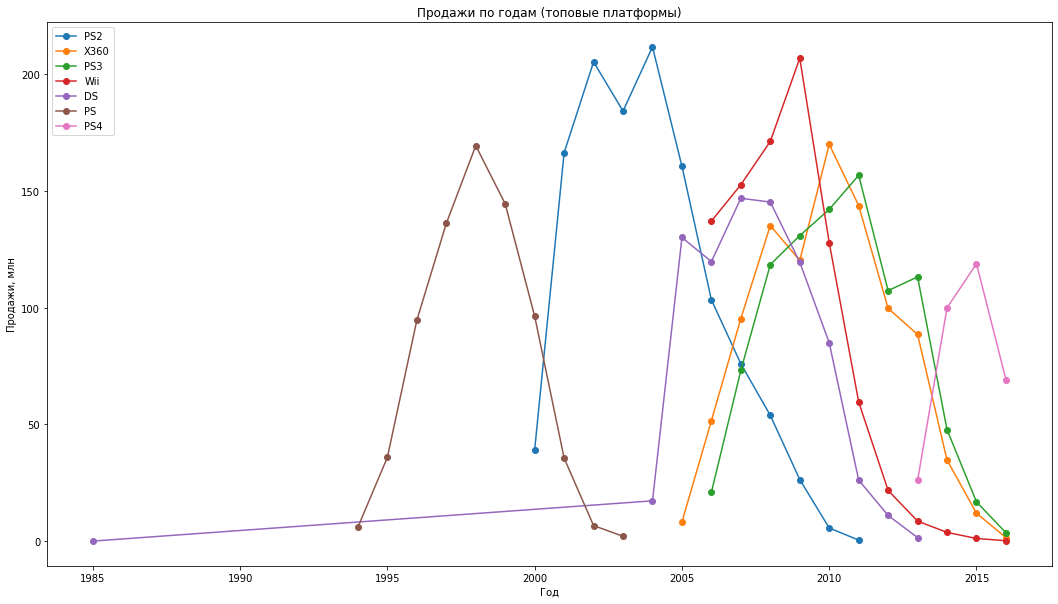

In [26]:
# Отсортируем платформы по суммарным продажам:
top_platforms = df.groupby('platform')['total_sales'].sum().reset_index()
top_platforms.sort_values(by='total_sales', ascending=False, inplace=True)
top_platforms.reset_index(inplace=True)

#display(top_platforms)

# Построим графики по платформам с разными категориями суммарных продаж:
year_sales(df, top_platforms.head(7)['platform'].values, 1980, 2016,'Продажи по годам (топовые платформы)')

### Выбор данных за соответствующий актуальный период.

Из графиков видим, что в среднем каждая платформа живёт около 10 лет и пик продаж в среднем приходится на 3-й или 4-й год с момента выпуска консоли. Так же можно обратить внимание, что как только у семейства PS происходит снижение продаж, то на смену приходит следующее поколение консолей. 


Также видим, что не только у PS, но и у других платформ , как только происходит стабильный спад, то на смену приходит следующее поколение и опять идёт вверх. Можно заметить, что предыдущее поколение игр умирает приблизительно через 4-5 лет после выпуска нового поколения, а пик продаж на новое поколение приходится приблизительно через 3-4 года после выпуска.  
Спад игр пошёл с 2011-2012 годов.

Исходя из вышеизложенного, для того, чтобы объективно составить прогноз на 2017 год, считаю необходимым взять для дальнейшего анализа  данные начиная с 2013 года, как раз когда продажи игр упали, старые поколения популярных платформ начинают умирать, а новые начинают набирать обороты. Хотя судя по графику, не успев выйти, то спустя 2 года продажи игры на эти платформы начинают стабильно падать.

Выделим актуальные на данный момент платформы, т.е. платформы стартовавшие относительно недавно и находящиеся в данный момент на подъёме. Судя по графику, это PS4 и XOne, вышедшие в 2013г.


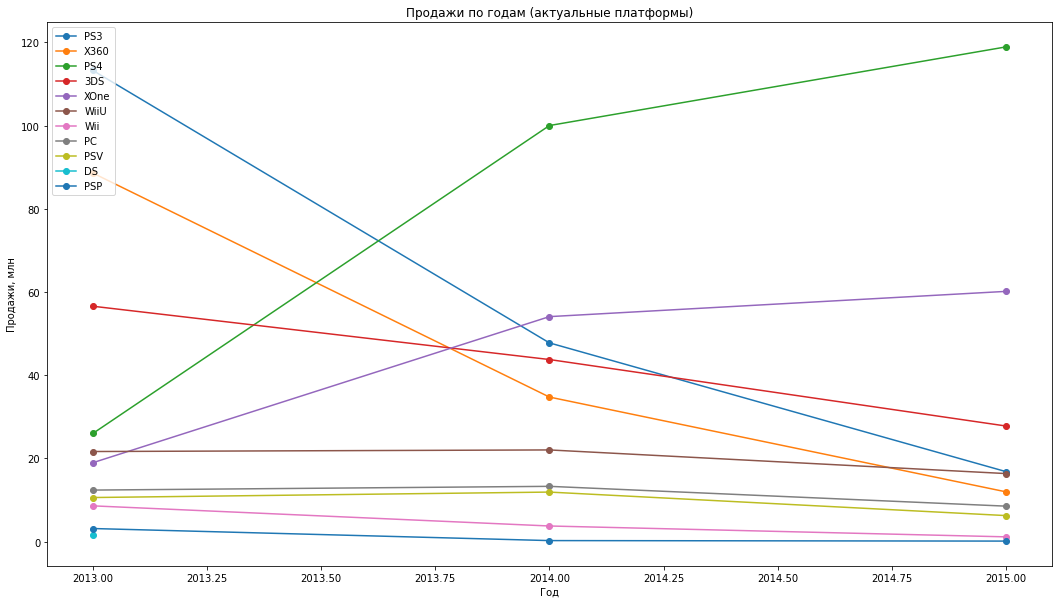

In [27]:
#new_df = df.query('2013 <= year_of_release <= 2016')
new_df = df[df['year_of_release'] >= 2013]
# 2016 год смотреть на графике не будем, т.к. данные по нему не полные
year_sales(new_df, new_df['platform'].unique(), 2013, 2015,'Продажи по годам (актуальные платформы)')

Так, что мы видим: самые популярные платформы это PS и XB. Мы ранее анализировали период "жизни" игр, проверим еще раз для убедительности правильность выбранного периода для дальнейшего анализа на самых популярных платформах. Построим графики за весь период именно для этих платформ.

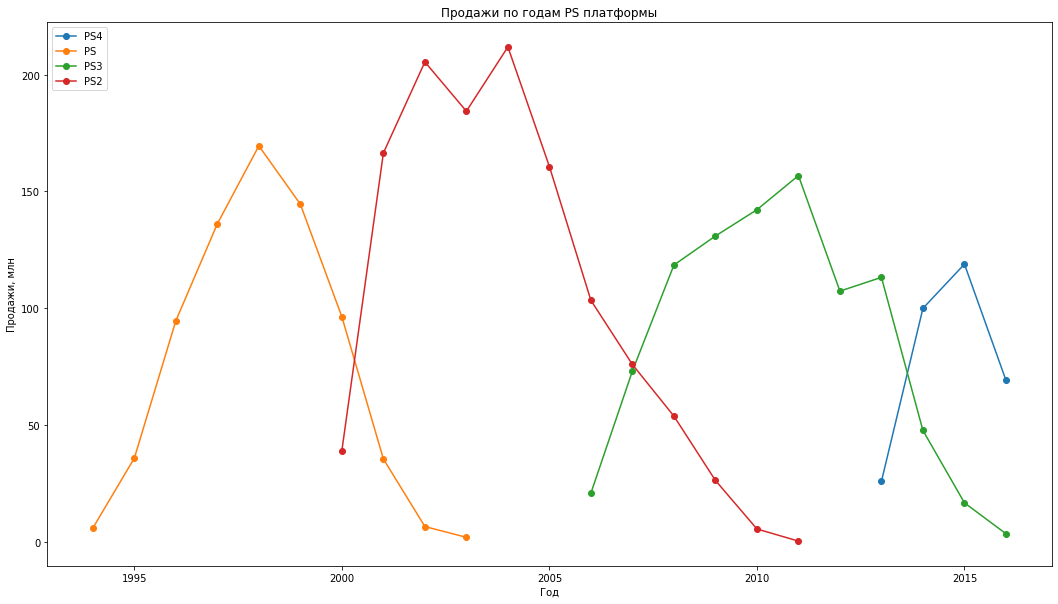

In [28]:
ps_platform = ['PS4', 'PS', 'PS3', 'PS2']
year_sales(df, ps_platform, 1980, 2016,'Продажи по годам PS платформы') 

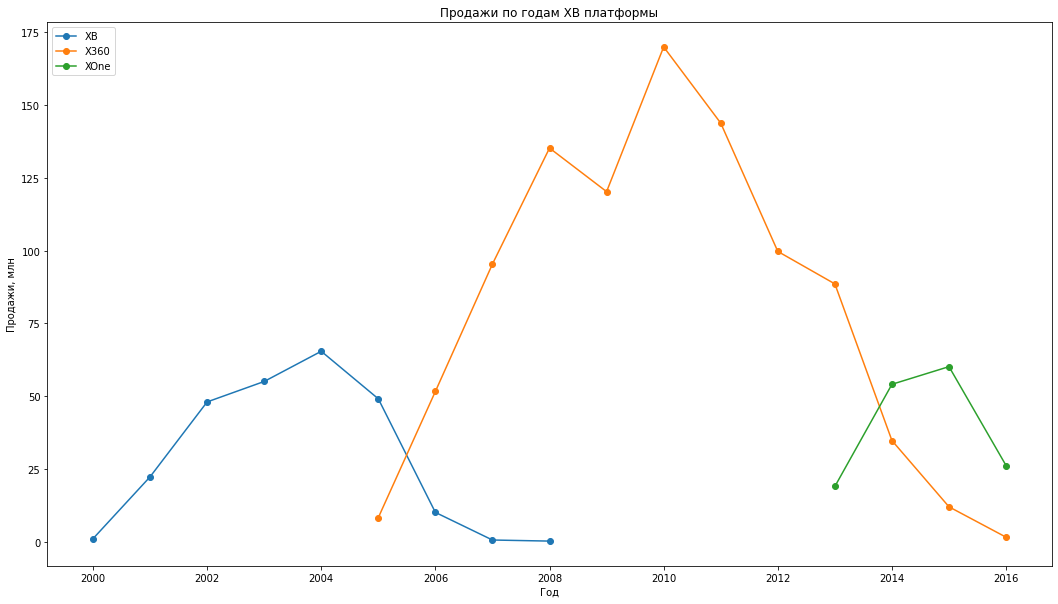

In [29]:
xb_platform = ['XB', 'X360', 'XOne']
year_sales(df, xb_platform, 1980, 2016,'Продажи по годам XB платформы') 


Вывод подтверждается по периоду "жизни" игр на платформах, по пику с спаду продаж, поэтому период для дальнейшего анализа, выбранный 2013 -2016 - верный.



### Выбор нескольких потенциально прибыльных платформ. Построение графика «ящик с усами».

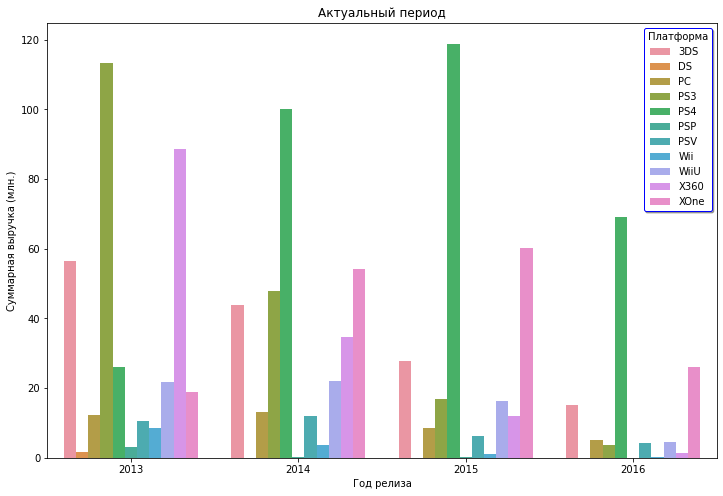

In [30]:
#  посмотрим на лидеров за актуальный период, построим графики.
new_new = new_df.groupby(['year_of_release', 'platform'], as_index=False)\
    .agg({'total_sales':'sum'})\
    .sort_values(by='year_of_release')
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(ax=ax, x = "year_of_release", y = "total_sales", hue = "platform", data = new_new)
plt.xlabel('Год релиза')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Актуальный период')
plt.legend(fontsize=10, shadow=True, facecolor='w', edgecolor='b', title='Платформа')

<AxesSubplot:xlabel='platform'>

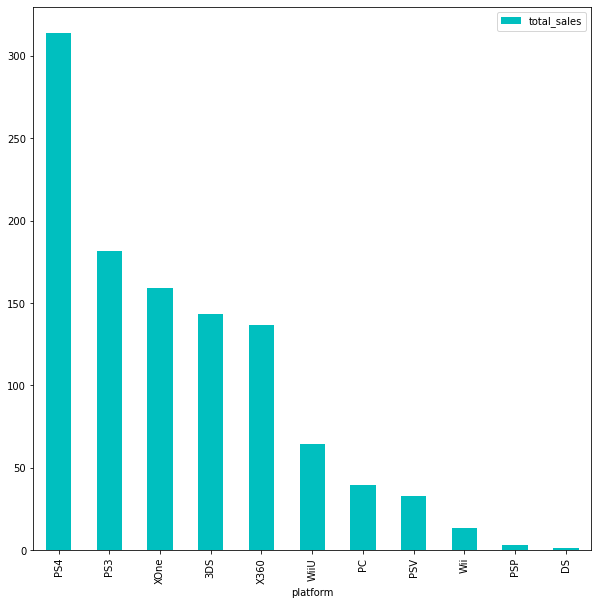

In [31]:
#сделаем визуализацию суммарных продаж по платформам за выбранный актуальный период
new_df.groupby('platform').agg({'total_sales':'sum'})\
    .sort_values(by='total_sales', ascending=False)\
    .plot(kind='bar', figsize=(10,10), color='c')

In [32]:
#посмотрим описательную статистику

new_df.pivot_table(index='platform', values='total_sales', aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
platform,,,,,,,,
3DS,0.04,0.09,0.28,303.00,14.60,0.47,0.01,1.38
DS,0.07,0.15,0.25,8.00,0.51,0.19,0.03,0.17
PC,0.03,0.08,0.23,189.00,3.05,0.21,0.01,0.35
PS3,0.04,0.15,0.51,345.00,21.05,0.53,0.01,1.45
PS4,0.06,0.20,0.73,392.00,14.63,0.80,0.01,1.61
PSP,0.01,0.02,0.07,67.00,0.24,0.05,0.01,0.06
PSV,0.02,0.04,0.11,358.00,1.96,0.09,0.01,0.15
Wii,0.04,0.18,0.76,23.00,3.58,0.59,0.01,0.92
WiiU,0.06,0.20,0.60,115.00,7.09,0.56,0.01,1.04


(0.0, 21.0)

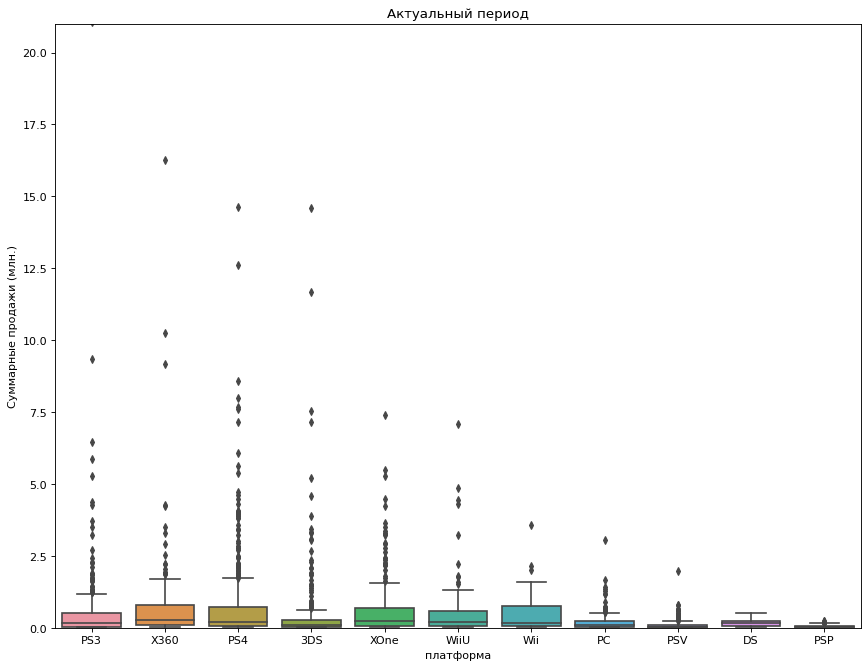

In [33]:
#исходя из данных описательной статистики построим "ящики с усами" применив максимум по шкале у "21"
plt.figure(figsize=(13,10), dpi=80)
sns.boxplot(x='platform', y='total_sales', data=new_df)
plt.xlabel('платформа')
plt.ylabel('Суммарные продажи (млн.)')
plt.title('Актуальный период')
plt.ylim([0, 21])

(0.0, 3.0)

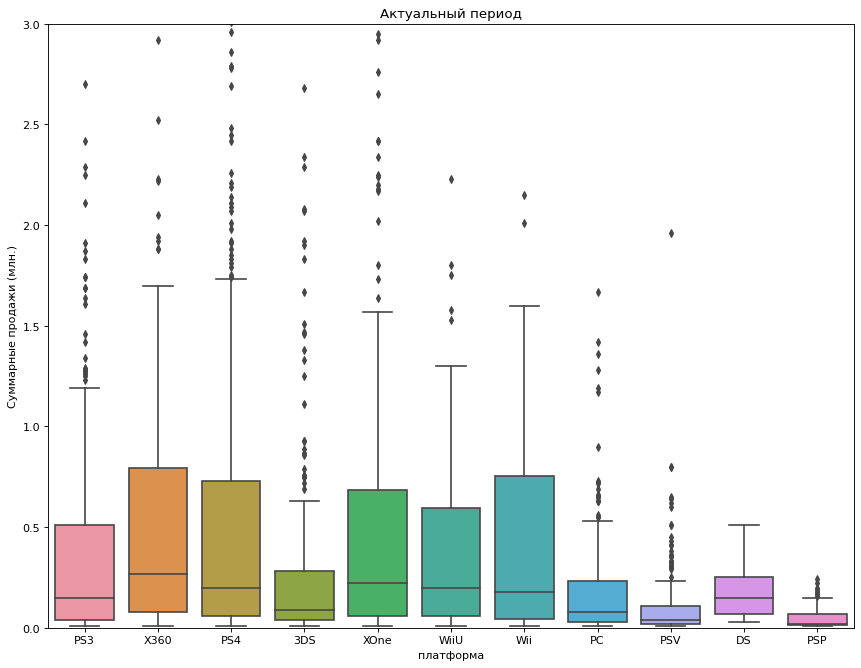

In [34]:
#обрежем выбросы, чтобы лучше увидеть медианы
plt.figure(figsize=(13,10), dpi=80)
sns.boxplot(x='platform', y='total_sales', data=new_df)
plt.xlabel('платформа')
plt.ylabel('Суммарные продажи (млн.)')
plt.title('Актуальный период')
plt.ylim([0, 3])

Как видим, что начиная с 2013 года продажи по старым платформам начинают понижаться, а новые поколения встают в лидирующие позиции по продажам игр, затем снова идёт общий упадок продаж. Первое место по продажам занимает платформа PS4. Также к лидерам можно отнести: XOne X360, WiiU, Wii. 

Посмотрим описательную статистику по продажам на этих платформах.

In [35]:
#оставила закомментированный старый код для понимания того, что изменила в проекте
#best_platform = ['PS4', 'XOne', 'WiiU', 'X360', 'Wii']
#for platform in best_platform:
    #print(platform)
    #print(new_df[new_df['platform'] == platform]['total_sales'].describe())
    

Наблюдается  большой разброс значений, о чём говорит внушительное стандартное отклонение.
Особенно наблюдается разница между 3-м квартилем и максимумом. Обрезать данные не будем. Могу объяснить такую особенность тем, что в действительности в короткие периоды времени , например, при выходе новой платформы и новой игры продажи резко возрастали (уходили резко в пиковые значения). В данном случае считаю, что не нужно подходить к вопросу только со статистической линейкой, более того аналитики в принципе нужны именно потому, что к вопросам надо подходить еще и с экспертной стороны (без автоматизации).

###  Изучение, влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков

In [36]:
# проверим, связь между отзывами и продажами компьютерных игр.
# функция строит график зависимости продаж 'sales' от параметра 'param', 
# а также вычисляет для них коэффициент корреляции Пирсона.
# Входные параметры:
    # df - DataFrame
    # sales - столбец с продажами
    # param - параметр, по которому проверяется связь с sales
    # style - стиль построения графика df.plot()
    # alpha - прозрачность линии графика df.plot()
    # ylim - минимальное значение оси ординат графика df.plot()
    # title - название графика 

def sales_relation(df, sales, param, style, alpha, ylim, title):
    (df
     .pivot_table(index=param, values=sales, aggfunc='sum')
     .plot(grid=True, style=style, title=title, ylim=ylim, figsize=(10, 5), alpha=alpha)
    )
    try:
        print('Коэффициент корреляции Пирсона /', sales, 'и', param, ':', df[sales].corr(df[param]))
    except:
        print('sales_relation: Коэффициент корреляции Пирсона вычислить не удалось')

Коэффициент корреляции Пирсона / total_sales и user_score : -0.022180308865818964
Коэффициент корреляции Пирсона / total_sales и critic_score : 0.39060159731130395


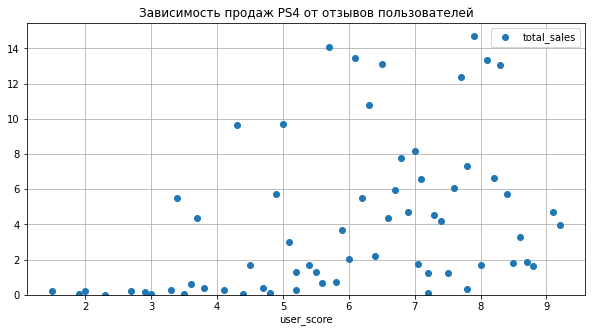

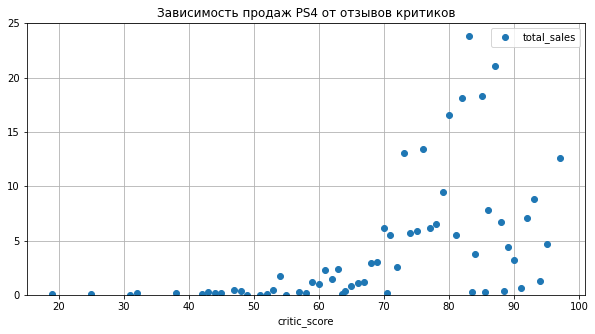

In [37]:
# рассмотрим зависимость продаж от отзывов пользователей на примере платформы PS4:
sales_relation(new_df[new_df['platform'] == 'PS4'], 'total_sales', 
               'user_score', 'o', 1, 0, 'Зависимость продаж PS4 от отзывов пользователей'
              )
# зависимость продаж от отзывов критиков для PS4:
sales_relation(new_df[new_df['platform'] == 'PS4'], 'total_sales',  
               'critic_score', 'o', 1, 0, 'Зависимость продаж PS4 от отзывов критиков'
              )

Коэффициент корреляции Пирсона / total_sales и user_score : -0.01326926966399776
Коэффициент корреляции Пирсона / total_sales и critic_score : 0.28855989114218167


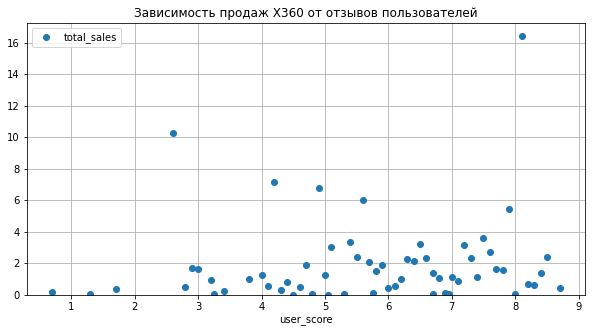

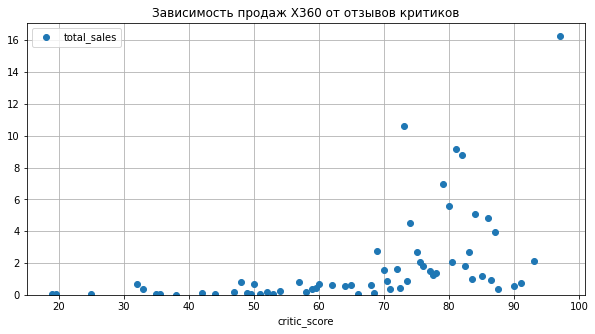

In [38]:
# проанализируем также платформу - X360:
sales_relation(new_df[new_df['platform'] == 'X360'], 'total_sales', 
               'user_score', 'o', 1, 0, 'Зависимость продаж X360 от отзывов пользователей'
              )
# зависимость продаж от отзывов критиков для X360:
sales_relation(new_df[new_df['platform'] == 'X360'], 'total_sales',  
               'critic_score', 'o', 1, 0, 'Зависимость продаж X360 от отзывов критиков'
              )

Text(0.5, 1.0, 'Взаимосвязь между общими продажами и оценками для PS4')

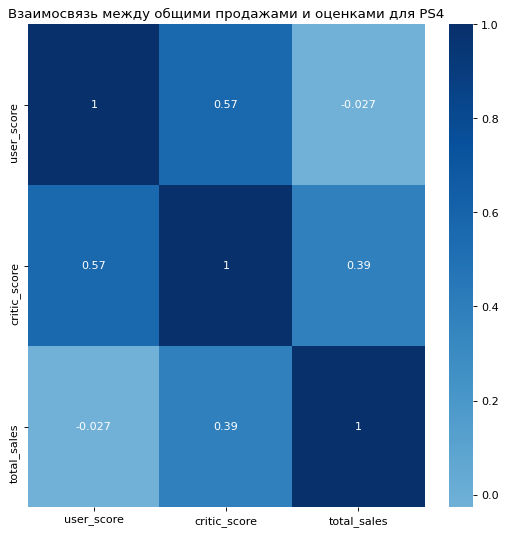

In [39]:
# посмотрим на взаимосвязь отзывов между продажами платформы PS4 и оценками пользователей и критиков
ps_best = new_df[new_df['platform'] == "PS4"]
ps_best = ps_best[ps_best['user_score'].isna() == False] 
ps_best = ps_best[ps_best['critic_score'].isna() == False]
ps_best = ps_best[['platform', 'user_score', 'critic_score', 'total_sales']]

plt.figure(figsize=(8,8), dpi= 80)
sns.heatmap(ps_best.corr(), xticklabels=ps_best.corr().columns,\
            yticklabels=ps_best.corr().columns, cmap='Blues', center=0, annot=True)
plt.title('Взаимосвязь между общими продажами и оценками для PS4')

Видим, что оценки пользователей  не влияют на продажи игр, но в то же время видно, что всё-таки оценки критиков имеют небольшой вес. 


Text(0.5, 1.0, 'Взаимосвязь между общими продажами и оценками')

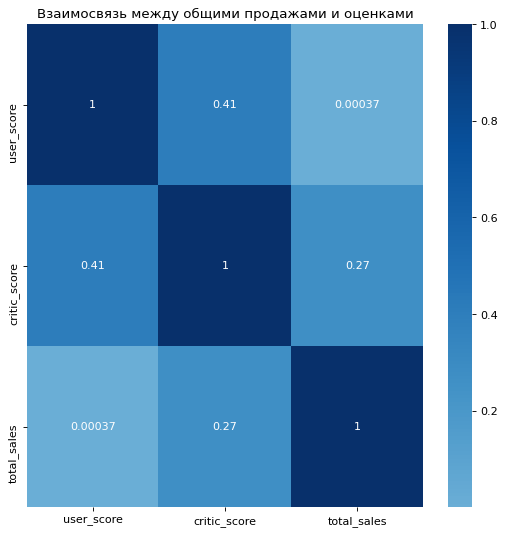

In [40]:
#посмотрим на взаимосвязь отзывов между продажами с других платформ и оценками пользователей и критиков
df_corr = new_df[new_df['platform'] != "PS4"]
df_corr = df_corr[df_corr['user_score'].isna() == False] 
df_corr = df_corr[df_corr['critic_score'].isna() == False]
df_corr = df_corr[['platform', 'user_score', 'critic_score', 'total_sales']]

plt.figure(figsize=(8,8), dpi= 80)
sns.heatmap(df_corr.corr(), xticklabels=df_corr.corr().columns,\
            yticklabels=df_corr.corr().columns, cmap='Blues', center=0, annot=True)
plt.title('Взаимосвязь между общими продажами и оценками')

С другими играми ситуация аналогичная. Оценки пользователей особой роли не играют, а оценки критиков  имеют небольшое влияние, что в целом логично, так как целевая аудитория критиков доверяет их мнению, и , следовательно, это влияет на продажи игр.



### Изучение общего распределения игр по жанрам.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Shooter'),
  Text(2, 0, 'Sports'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Misc'),
  Text(5, 0, 'Platform'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Adventure'),
  Text(9, 0, 'Simulation'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

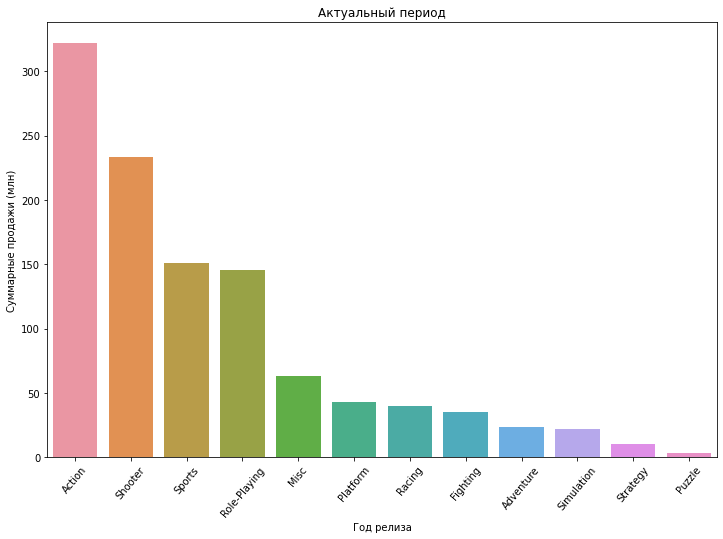

In [41]:
# построим графики продаж по жанрам
best_genre = new_df.groupby('genre', as_index=False)\
    .agg({'total_sales':'sum'}).sort_values('total_sales', ascending=False)
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(ax=ax, x = 'genre', y = "total_sales", data = best_genre)
plt.xlabel('Год релиза')
plt.ylabel('Суммарные продажи (млн)')
plt.title('Актуальный период')
plt.xticks(rotation=50)

In [42]:
# сделаем для удобства изучения таблицу продаж по жанрам
best_genre = (new_df.groupby('genre')
                    .agg(
                        count = ('platform', 'count'),
                        sales_sum = ('total_sales', 'sum'),
                        sales_mean = ('total_sales', 'mean'))
                    .reset_index()
                )
print(best_genre.sort_values('sales_sum', ascending=False))

           genre  count  sales_sum  sales_mean
0         Action    766     321.87        0.42
8        Shooter    187     232.98        1.25
10        Sports    214     150.65        0.70
7   Role-Playing    292     145.89        0.50
3           Misc    155      62.82        0.41
4       Platform     74      42.63        0.58
6         Racing     85      39.89        0.47
2       Fighting     80      35.31        0.44
1      Adventure    245      23.64        0.10
9     Simulation     62      21.76        0.35
11      Strategy     56      10.08        0.18
5         Puzzle     17       3.17        0.19


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Shooter'),
  Text(2, 0, 'Role-Playing'),
  Text(3, 0, 'Misc'),
  Text(4, 0, 'Sports'),
  Text(5, 0, 'Fighting'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Simulation'),
  Text(8, 0, 'Platform'),
  Text(9, 0, 'Strategy'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Puzzle')])

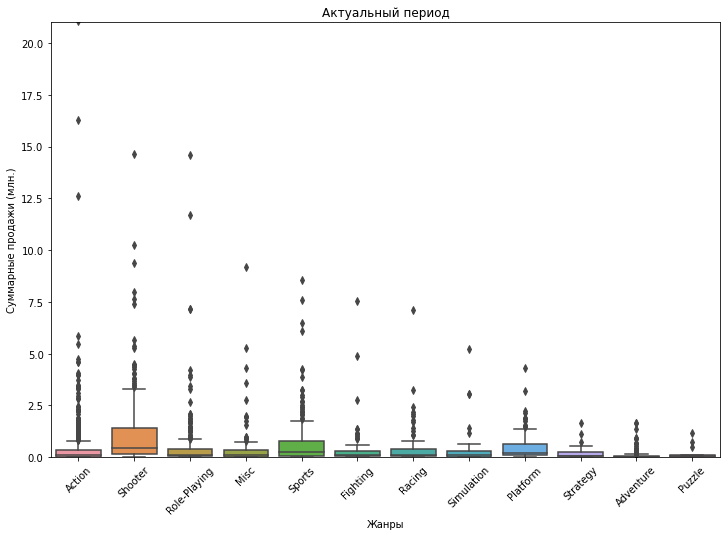

In [43]:
plt.figure(figsize=(12,8))
sns.boxplot(x='genre', y='total_sales', data=new_df)
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи (млн.)')
plt.title('Актуальный период')
plt.ylim([0, 21])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Shooter'),
  Text(2, 0, 'Role-Playing'),
  Text(3, 0, 'Misc'),
  Text(4, 0, 'Sports'),
  Text(5, 0, 'Fighting'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Simulation'),
  Text(8, 0, 'Platform'),
  Text(9, 0, 'Strategy'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Puzzle')])

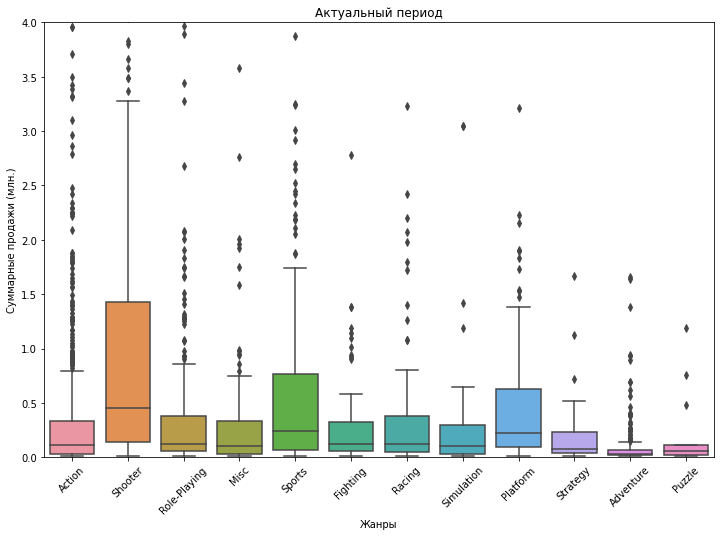

In [44]:
# построим урезанные  диаграммы размаха для продаж по жанрам за актуальный период, чтобы более наглядно видеть медианы
plt.figure(figsize=(12,8))
sns.boxplot(x='genre', y='total_sales', data=new_df)
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи (млн.)')
plt.title('Актуальный период')
plt.ylim([0, 4])
plt.xticks(rotation=45)

Самыми прибыльными являются игры жанра Shooter. На втором месте игры жанра - Спорт. Видим высокие продажи по играм жанра Action, но по среднему значению продаж , диаграммам распределения картина проясняется - их количество в 4 раза больше, чем Shooter и Sport, а средние продажи по Action меньше более чем в 3 раза, чем продажи по Shooter.
Самыми невостребованные игры - приключения Adventure, головоломки Pazzle и стратегии Strategy.



### Вывод.

Итак, после проведения исследовательского анализа можно приходим к следующим выводам:
 1. Максимальное количество игр было выпущено в период 2008-2009 годах. Затем постепенно происходит снижение колличества игр и так же резкое снижение выпускаемых игр, начиная с 2012 года. Возможные причины: рост игр на мобильных устройствах (телефоны, планшеты), также разработка игр становится более трудоемкой, в связи с возросшими требованиями потребителей к графике и иным возможностям игр, и на разработку уходит больше времени. Одновременно, возможно, что разработчики анализируя огромную популярность определенных игр, могли сменить стратегию с выпуска новых игр, на апгрейд уже выпущенных ранее.
 
 2. В среднем каждая платформа живёт около 10 лет и пик продаж в среднем приходится на 3-й или 4-й год с момента выпуска консоли. Как только происходит стабильный спад, то на смену приходит следующее поколение и опять идёт вверх. Можно заметить, что предыдущее поколение игр умирает приблизительно через 4-5 лет после выпуска нового поколения.Резкий спад продаж игр пошёл с 2011-2012 годов.

3. Больше всего люди покупают игры на платформах Xbox или Playstation. Из графиков видим, что это PS4 и XOne, вышедшие в 2013г.И на период исследования продажи игр данных платформ также на подъёме. Также к лидерам продаж можно отнести: XOne X360, WiiU, Wii.

4. Оценки пользователей не имеют влияния на продажи игр, а оценки критиков имеют небольшое влияние, что в целом логично, так как целевая аудитория критиков доверяет их мнению, и , следовательно, это влияет на продажи.

5. Самыми прибыльными являются игры жанра Shooter. На втором месте игры жанра - Спорт. Видим высокие продажи по играм жанра Action, но по среднему значению продаж , диаграммам распределения картина проясняется - их количество в 4 раза больше, чем Shooter и Sport, а средние продажи по Action меньше более чем в 3 раза, чем продажи по Shooter. Самыми невостребованные игры - приключения Adventure, головоломки Pazzle и стратегии Strategy.


## Портрет пользователя.

### Определение самых популярных платформ (топ-5) для регионов Северная Америка, Европа, Япония.

In [45]:
# Функция выводит пятёрку самых популярных в регионе 'region' платформ по данным 'df' с заголовком 'title'
    
    
def top_region(how_group, region, xlabel, title):
    data = new_df.groupby(how_group, as_index=False).agg({region:'sum'}).sort_values(by=region, ascending=False)
    data['ratio'] = data[region] / data[region].sum()
    print(title, '- популярные платформы:')
    print(data.head())
    fig, ax = plt.subplots(figsize=(10,7))
    sns.barplot(x = how_group, y = data['ratio'], data = data.head())
    plt.xlabel(xlabel)
    plt.ylabel('Доля рынка продаж')
    plt.title(title)

Северная Америка - популярные платформы:
   platform  na_sales  ratio
4       PS4    108.74   0.25
10     XOne     93.12   0.21
9      X360     81.66   0.19
3       PS3     63.50   0.15
0       3DS     38.20   0.09


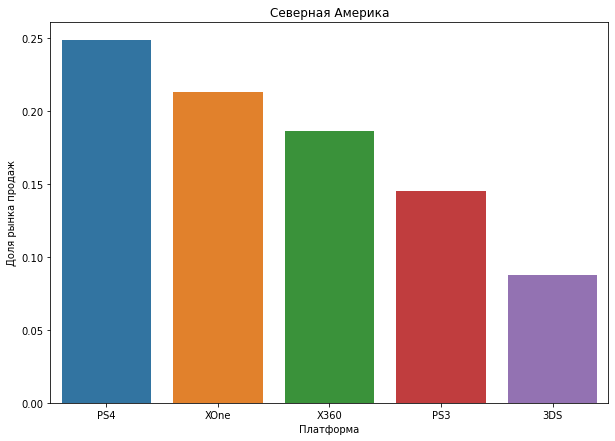

In [46]:
top_region('platform', 'na_sales', 'Платформа', 'Северная Америка')

Европа - популярные платформы:
   platform  eu_sales  ratio
4       PS4    141.09   0.36
3       PS3     67.81   0.17
10     XOne     51.59   0.13
9      X360     42.52   0.11
0       3DS     30.96   0.08


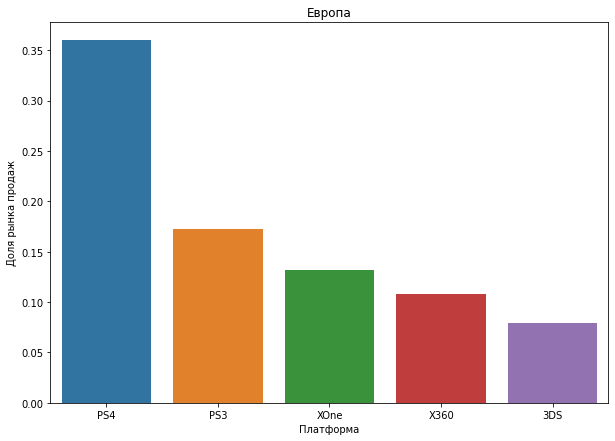

In [47]:
top_region('platform', 'eu_sales', 'Платформа', 'Европа')

Япония - популярные платформы:
  platform  jp_sales  ratio
0      3DS     67.81   0.48
3      PS3     23.35   0.17
6      PSV     18.59   0.13
4      PS4     15.96   0.11
8     WiiU     10.88   0.08


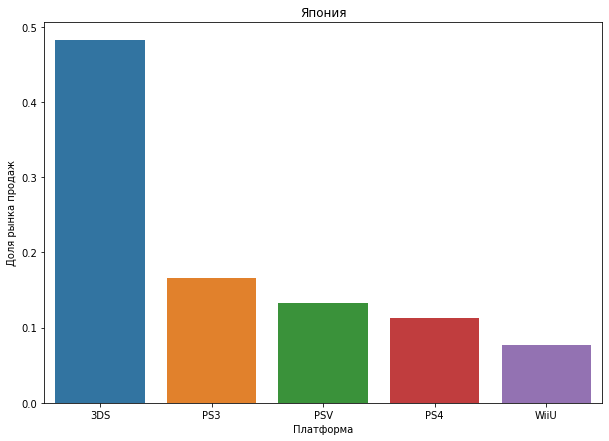

In [48]:
top_region('platform', 'jp_sales', 'Платформа', 'Япония')

In [49]:
def top_region_new(df, how_group, region, title):
    data = new_df.groupby(how_group, as_index=False).agg({region:'sum'}).sort_values(by=region, ascending=False)
    data['ratio'] = data[region] / data[region].sum()
    print(title, '- популярные платформы:')
    print(data.head())
    data.head().groupby(how_group).agg({region:'sum'}).plot.pie(y=region, autopct='%.2f', fontsize=10, figsize=(10, 8))
    plt.xlabel('Популярные платформы')
    plt.ylabel('Проценты продаж')
    plt.title(title)
    
    

Северная Америка - популярные платформы:
   platform  na_sales  ratio
4       PS4    108.74   0.25
10     XOne     93.12   0.21
9      X360     81.66   0.19
3       PS3     63.50   0.15
0       3DS     38.20   0.09


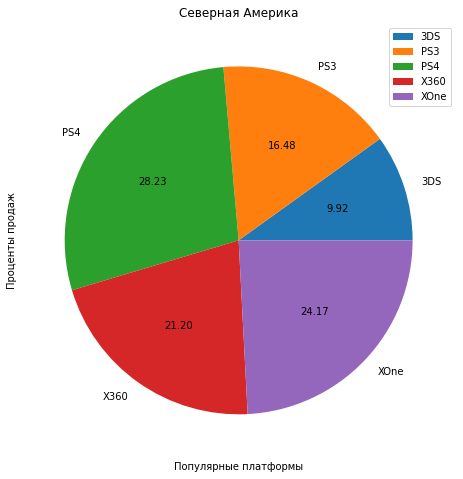

In [50]:
top_region_new(new_df, 'platform','na_sales', 'Северная Америка')


Европа - популярные платформы:
   platform  eu_sales  ratio
4       PS4    141.09   0.36
3       PS3     67.81   0.17
10     XOne     51.59   0.13
9      X360     42.52   0.11
0       3DS     30.96   0.08


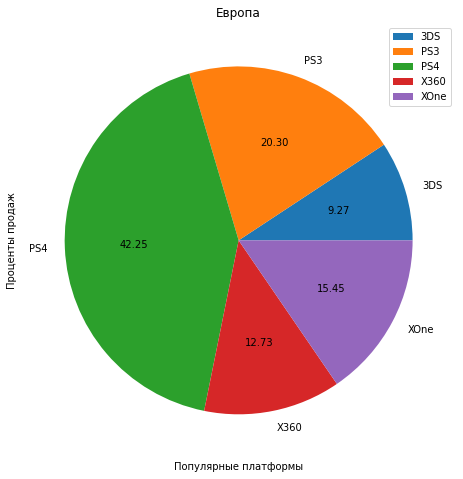

In [51]:
top_region_new(new_df, 'platform','eu_sales', 'Европа')

Япония - популярные платформы:
  platform  jp_sales  ratio
0      3DS     67.81   0.48
3      PS3     23.35   0.17
6      PSV     18.59   0.13
4      PS4     15.96   0.11
8     WiiU     10.88   0.08


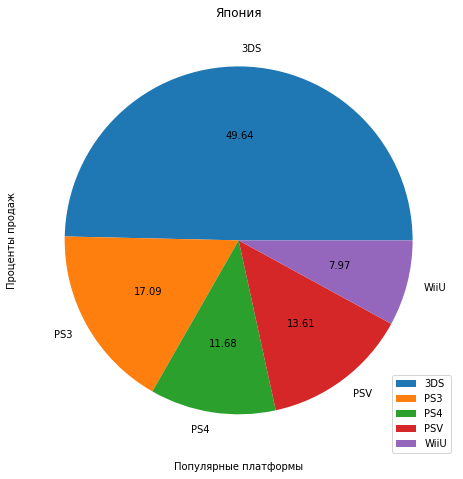

In [52]:
top_region_new(new_df, 'platform','jp_sales', 'Япония')

Самая распространённая в регионах Северной Америки и Европы платформа  - PS4. PS3 и XOne также очень популярна в этих регионах и входит в топ-5, только порядок популярности распределен немного по разному: в Европе на втором месте PS3, а в Северной Америке XOne.
Америка и Европа играют примерно на одних и тех же платформах. 
В Японии предпочитают 3DS от японского производителя Nintendo, а также различные платформы семейства PlayStation (также японского производства). Более того, платформа PS4 в Японии только на четвертом месте по популярности.


### Определение самых популярных игр (топ-5) по жанрам в регионах.

Теперь посмотрим на самые популярные жанры игр по регионам.

Северная Америка - популярные платформы:
           genre  na_sales  ratio
0         Action    126.05   0.29
8        Shooter    109.74   0.25
10        Sports     65.27   0.15
7   Role-Playing     46.40   0.11
3           Misc     27.49   0.06


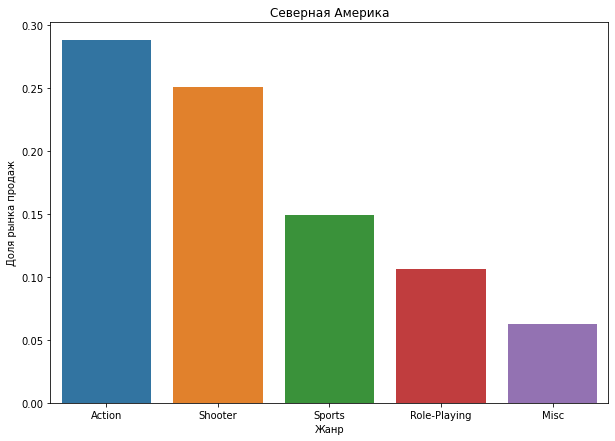

In [54]:
top_region('genre', 'na_sales', 'Жанр', 'Северная Америка')

Европа - популярные платформы:
           genre  eu_sales  ratio
0         Action    118.13   0.30
8        Shooter     87.86   0.22
10        Sports     60.52   0.15
7   Role-Playing     36.97   0.09
6         Racing     20.19   0.05


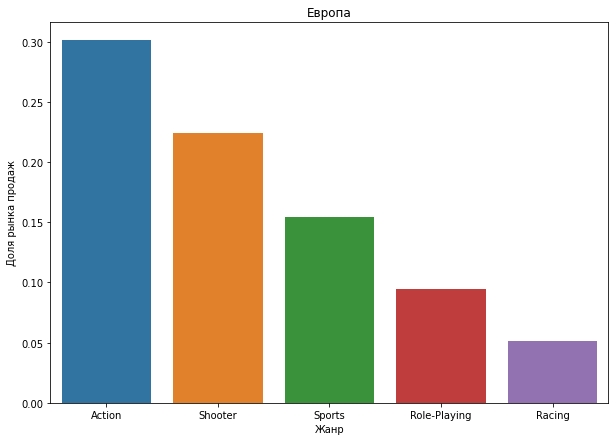

In [55]:
top_region('genre', 'eu_sales', 'Жанр', 'Европа')

Япония - популярные платформы:
          genre  jp_sales  ratio
7  Role-Playing     51.04   0.36
0        Action     40.49   0.29
3          Misc      9.20   0.07
2      Fighting      7.65   0.05
8       Shooter      6.61   0.05


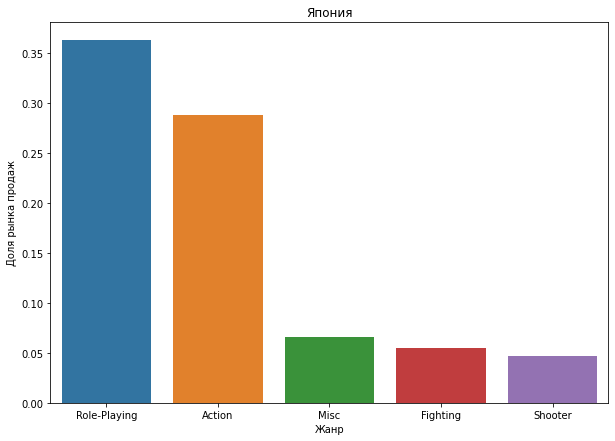

In [56]:
top_region('genre', 'jp_sales', 'Жанр', 'Япония')

Самые популярные игры в Северной Америке и Европе (в порядке убывания) - это Экшн, Шутер и Спорт. При этом средние продажи не сильно отличаются. 
Топ-5 популярных жанров в Северной Америке и Европе почти совпадают (только Role-Playing и Misc поменялись местами).
В Японии не так любят Шутеры и спортивные игры., а предпочитают ролевые жанры, а Экшн на втором месте (все же популер очень этот жанр).

### Влияние рейтинга ESRB на продажи по регионам.

In [57]:
# в столбце rating лежат оценки согласно организации ESRB
# создажим функцию для определения суммы продаж в зависимости от рейтинга ESBR
def top_rating(df, how_group, region, title):
    data = df.groupby(how_group, as_index=False).agg({region:'sum'}).sort_values(by=region, ascending=False)
    fig, ax = plt.subplots(figsize=(10,7))
    sns.barplot(ax=ax, x = how_group, y = region, data = data)
    plt.xlabel('Рейтинг ESRB')
    plt.ylabel('Суммарные продажи (кол.млн)')
    plt.title(title)

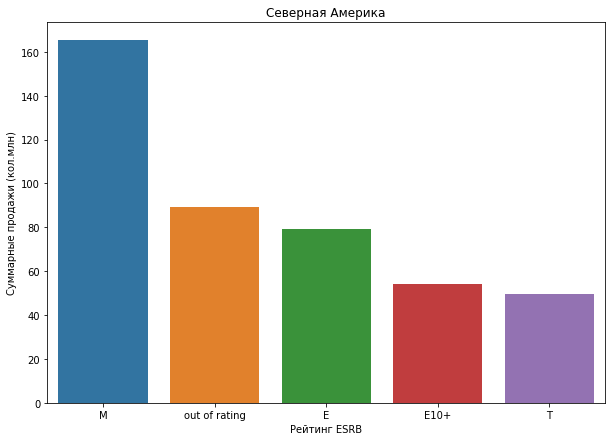

In [58]:
top_rating(new_df, 'rating', 'na_sales', 'Северная Америка')

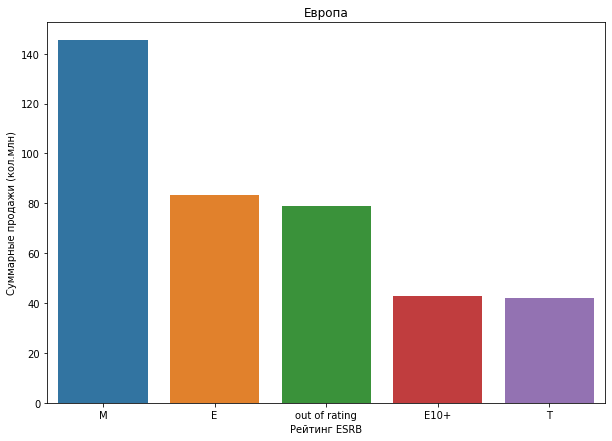

In [59]:
top_rating(new_df, 'rating', 'eu_sales', 'Европа')

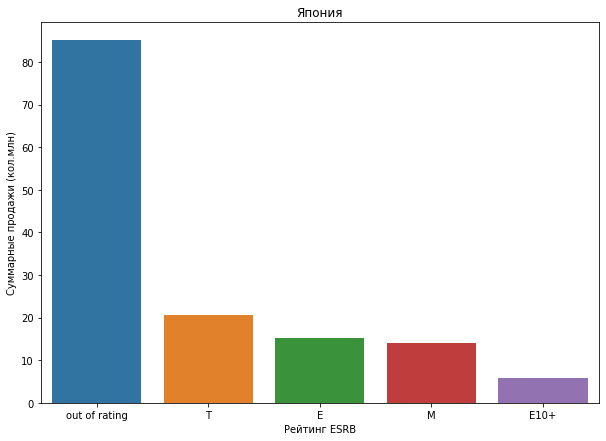

In [60]:
top_rating(new_df, 'rating', 'jp_sales', 'Япония')

Ух ты, вот и показался регион с играми "вне рейтинга". Интересно. Думаю, следует посмотреть процент таких игр по регионам, для более детального понимания ситуации. 

In [61]:
# напишем функцию для определения процентов продаж по рейтингу ESRB для регионов 
def good_rating(df, how_group, region, title):
    new_df.groupby(how_group).agg({region:'sum'}).plot.pie(y=region, autopct='%.2f', fontsize=10, figsize=(10, 8))
    plt.xlabel('Рейтинг ESRB')
    plt.ylabel('Проценты продаж по рейтингу')
    plt.title(title)

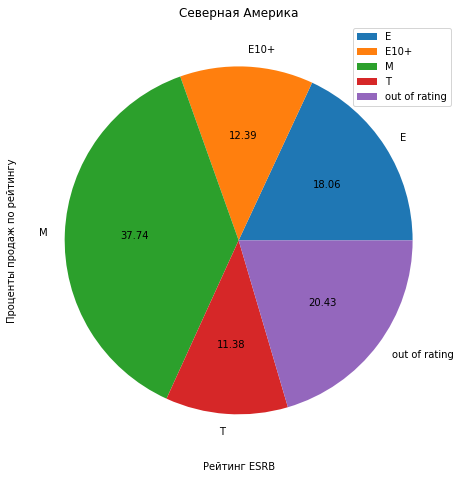

In [62]:
# посмотрим процентное распределдение для Северной Америки
good_rating(new_df, 'rating', 'na_sales', 'Северная Америка')

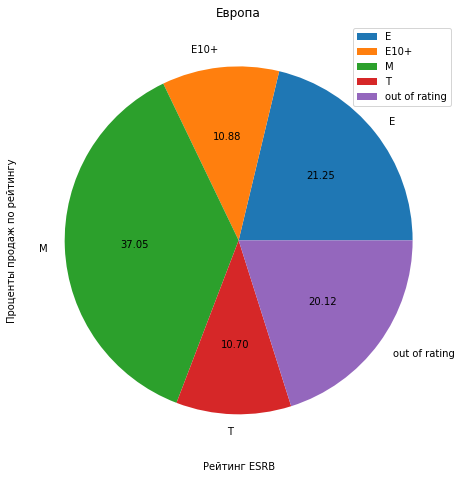

In [63]:
# посмотрим процентное распределдение для Европы
good_rating(new_df, 'rating', 'eu_sales', 'Европа')

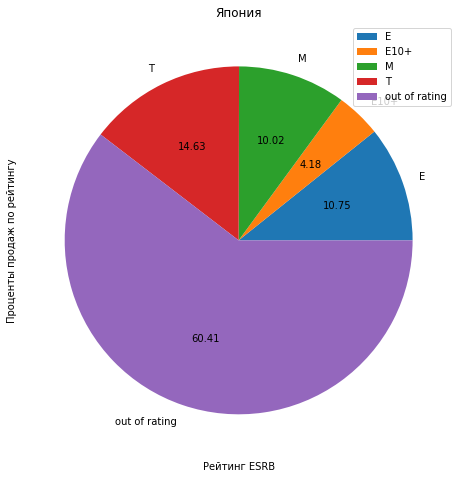

In [64]:
# А теперь смотрим процентное распределдение для Японии
good_rating(new_df, 'rating', 'jp_sales', 'Япония')

Вот и увидели, что именнло в Японии 60% игр "вне рейтинга", и из вышеизложенных предположений теперь точно понимаем, что Япония дает такой показатель по причине наличия своего рейтинга в стране, а именно:  CERO — японская рейтинговая организация. 

### Вывод.

Итак, уже вырисовывается портрет пользователя по регионам, а именно:

В Европе и Северной Америке лидируют возрастные категории для взрослых от 17 лет и старше, а вот в Японии самые популярные игры для подростков от 13 лет и старше.

Теперь отдельно по регионам:


Северная Америка:

Самые популярные игровые платформы в Северной Америке (топ-5 по убыванию): PS4, XOne, X360, 3DS, PS3
Самые популярные жанры в Северной Америке (топ - 5 по убыванию): Shooter, Action, Sports, Role-Playing, Misc
Самые популярные игры в Северной Америке по рейтингу ESRB по убыванию: игры для взрослых от 17 лет, игры для всех возрастосв от 6 лет, игры от 10 лет и старше, от 13 лет  и старше.

Европа:

Самые популярные игровые платформы Европе (топ-5): PS4, PS3, XOne, ,X360, 3DS
Самые популярные жанры в Европе (топ - 5 по убыванию): Action, Shooter, Sports, Role-Playing, Racing
Самый предпочитаемый рейтинг в Европе по убыванию: игры для взрослых от 17 лет, игры для всех возрастосв от 6 лет, для возраста от 10 лет  и старше, игры от 13 лет и старше.

Япония сильно отличается по предпочтениям от Америки и Европы:

Самые популярные игровые платформы в Японии - японские платформы (топ-5): 3DS, PS3, PSV,PS4, WiiU
Самые популярные жанры в Японии (топ - 5 по убыванию): Role-Playing, Action, Fighting, Misc, Shooter
Самый предпочитаемый рейтинг в Японии по убыванию: игры от 13 лет и старше, игры для всех возрастосв от 6 лет, игры для взрослых от 17 лет, игры для возраста от 10 лет. Особенно стоит отметить что 60 % продаж игр в Японии занимают игры вне рейтинга ESRB по вышеуказанной причине.

Примечание (расшифровка рейтинга для удобства анализа)

E - для всех возрастов от 6 лет

E10+ - Для всех от 10 лет и старше

T - для подростков от 13 лет и старше

M - для взрослых от 17 лет и старше

EC - для всех возрастов (все), тоже самое, что и Е

RP - продукт был отправлен в ESRB и ожидает присвоения рейтинга

K-A - для всех возрастов (все), тоже самое, что и Е

AO - только для взрослых старше 18 лет

5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Предположим, что пользовательские рейтинги платформ Xbox One и PC равны между собой - это наша нулевая гипотеза H0.

Проверим нулевую гипотезу о равенстве средних значений двух выборок:

## Проверка гипотез.

Для проверки гипотез применим t-тест. Причины, по которым мы будем его применять:

t-тест — работает для выборки любого размера
по значению p-value можно сразу понять, отвергать двустороннюю гипотезу или нет, сравнив это значение с выбранным уровнем значимости
исследуемые генеральные совокупности (наши выборки) взаимонезависимы.


Перед тем как проводить t-test проверим распределение.

In [65]:
# построим функцию для построений графиков распределения для проверки гипотез
new_df_dropna = new_df.dropna(subset=['user_score'])
xone_score_one = new_df_dropna.query('platform == "XOne"')
pc_score_two = new_df_dropna.query('platform == "PC"') 
action_score_one = new_df_dropna.query('genre == "Action"')
sports_score_two = new_df_dropna.query('genre == "Sports"') 

def good_score(df_one, df_two, param, title):
    plt.figure(figsize=(8,5))
    plt.title('распределение пользовательского рейтинга')
    plt.ylabel('Плотность')
    sns.distplot(df_one[param], color='g', label='score_one')
    sns.distplot(df_two[param], color='blue', label='score_two')
        #sns.distplot(df_first[param], color='g', label='XOne')
        #sns.distplot(df_second[param], color='blue', label='PC')
    plt.legend()
    plt.show()
    
    

In [66]:
# напишем функцию для расчета проверки гипотез
xone_score = new_df[(new_df['platform'] == 'XOne') & 
                            ~(new_df['user_score'].isna())]['user_score'].values
pc_score = new_df[(new_df['platform'] == 'PC') & 
                            ~(new_df['user_score'].isna())]['user_score'].values
action_score = new_df[(new_df['genre'] == 'Action') &
                             ~(new_df['user_score'].isna())]['user_score']
sports_score = new_df[(new_df['genre'] == 'Sports') &
                             ~(new_df['user_score']. isna())]['user_score']


def t_test(first_df, second_df, alpha, equal_var):
    alpha = alpha
    results = st.ttest_ind(first_df, second_df, equal_var = equal_var)
    print('p-значение:', results.pvalue)
    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else: 
        print("Не получилось отвергнуть нулевую гипотезу")

### Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Теперь проверим гипотезы.

Первая гипотеза:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - это наша нулевая гипотеза H0.


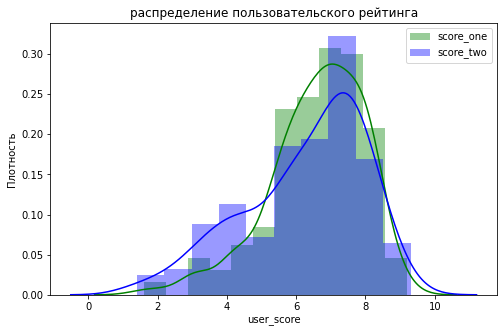

In [67]:
#  пользовательские рейтинги score one - для платформы "XOne", score_two - для платформы PC
good_score(xone_score_one, pc_score_two, 'user_score', 'распределение пользовательского рейтинга')

Распределение нормальное, применяем т-тест

In [68]:
t_test(xone_score, pc_score, 0.05, False)

p-значение: 0.038056752824864336
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что средниие оценки пользователей по платформам Xbox One и PC не равны. Разница между этими значениями есть, и вероятность того, что такую или большую разницу можно получить случайно равна 3%. Мы не можем подтвердить нулевую гипотезу, следовательно мы ее отвергаем и предполагаем, что Средние пользовательские рейтинги платформ Xbox One и PC - не одинаковые.

### Проверка гипотезы: средние пользовательские рейтинги жанров Action (и Sports  разные

Предположим, что пользовательские рейтинги жанров Action и Sports равны между собой - это наша нулевая гипотеза H0.

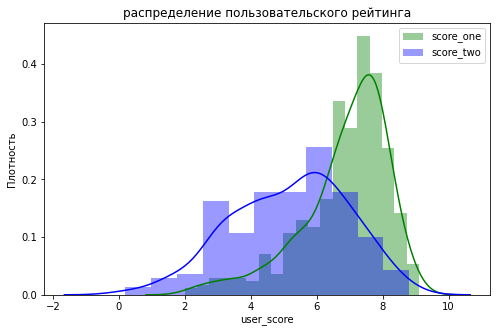

In [69]:
# проверим по графику распределение используя ранее написанную функцию
# где score_one - это жанр Action, score_two - жанр Sport

good_score(action_score_one, sports_score_two, 'user_score', 'распределение пользовательского рейтинга')


Распределение тяготеет к нормальному, скошено влево. Все же применим т-тест, по указанным выше причинам.

In [70]:
t_test(action_score, sports_score, 0.05, False)

p-значение: 2.078555165233204e-25
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что средние значения наших выборок не равны. И вероятность того, что такой результат мы получили случайно ничтожно мала.обозначение "e-25" в конце pvalue говорит о том, что это экспоненциальная запись, (чтобы понять итоговое значение такого числа, надо и соответственно значение 2.078555165233204 умножить на 1- в минус 25 степени) и конечно же оно в значительной степени ниже alpha = 0.05.

Вероятно, что пользовательские рейтинги жанров Action и Sports различаются. Обратного мы доказать не смогли.

### Вывод.

Итак, после проведения статистического анализа можем заключить, что:

Средние пользовательские рейтинги платформ Xbox one и PC не равны.
Средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод.


Ещк раз вернемся к основной цели проекта, а именно, была задача:
Используя исторические данные о продажах компьютерных игр выявить закономерности, определяющие успешность игры. Определить потенциально популярный продукт и спланировать рекламные кампании в следующем году.

Исходя из аналитического исследования рекомендую при планировании рекламной кампании на следующий год (2017), уделить особое внимание играм следующих жанров:

Shooter. По ним наблюдаются самые высокие средние продажи в Северной Америке и Европе.
Sports. Хорошо продаются в Америке и Европе.
Role-Playing. Самые высокие средние продажи в Японии , меньше, но очень востребованы в Северной  Америке и Европе.
Жанр Action очень популярен среди производителей компьютерных игр. Однако, средние сборы по играм данного жанра не показывают высоких результатов. Поэтому все же не рекомендую вкладывать денежные средства в рекламную компанию этого жанра на 2017 год.


Относительно платформ, вижу перспективу вложений в рекламные компании следующих потенциально прибыльных платформ:

PS4. Находится на подъеме продаж. Популярна во всех регионах (в Японии меньше).
Xbox One. Также на подъеме. Высокая популярность  в Америке и Европе.

Относительно продаж в Японии и развития рекламной компании, следует уделить особое значение этой стране, так как данный регион сильно отличается по пользовательским запросам (предпочтениям). 

Детализированная разбивка предпочтений по регионам:

Северная Америка:

Самые популярные игровые платформы в Северной Америке (топ-5 по убыванию): PS4, XOne, X360, 3DS, PS3 Самые популярные жанры в Северной Америке (топ - 5 по убыванию): Shooter, Action, Sports, Role-Playing, Misc Самые популярные игры в Северной Америке по рейтингу ESRB по убыванию: игры для взрослых от 17 лет, игры для всех возрастосв от 6 лет, игры от 10 лет и старше, от 13 лет и старше.

Европа:

Самые популярные игровые платформы Европе (топ-5): PS4, PS3, XOne, ,X360, 3DS Самые популярные жанры в Европе (топ - 5 по убыванию): Action, Shooter, Sports, Role-Playing, Racing Самый предпочитаемый рейтинг в Европе по убыванию: игры для взрослых от 17 лет, игры для всех возрастосв от 6 лет, для возраста от 10 лет и старше, игры от 13 лет и старше.

Япония сильно отличается по предпочтениям от Америки и Европы:

Самые популярные игровые платформы в Японии - японские платформы (топ-5): 3DS, PS3, PSV,PS4, WiiU Самые популярные жанры в Японии (топ - 5 по убыванию): Role-Playing, Action, Fighting, Misc, Shooter Самый предпочитаемый рейтинг в Японии по убыванию: игры от 13 лет и старше, игры для всех возрастосв от 6 лет, игры для взрослых от 17 лет, игры для возраста от 10 лет. Особенно стоит отметить что 60 % продаж игр в Японии занимают игры вне рейтинга ESRB по вышеуказанной причине.


При планировании рекламной кампании учитывать отзывы пользователей и критиков смысла нет, так как связь между отзывами пользователейи продажами выялена не была. 


Связь с оценками критиков и продажами выявлена в незначительной степени, в связи с чем рекомендую обратить внимание на сотрудничество с популярными критиками для повышения их оценок и соответственно, продаж.

Также для более точного прогнозирования продаж и, следовательно, вложений в рекламную компанию, считаю необходимым проанализировать данные по продажам в Европе и Японии в соответствии с рейтингами этих регионов, а именно:  PEGI — европейская рейтинговая система компьютерных и видеоигр, CERO — японская рейтинговая организация). 
                                                                    
                                                                    